In [1]:
import torch
import torch.utils.data as data
import pandas as pd
import matplotlib.pyplot as plt
from src.error_measures import collect_stats, print_average_stats, gather_predictions
from src.models import MultiLayerANN, SynapticSNN, LeakySNN, DoubleLeakySNN
from src.train_model import training_loop, training_loop_stats
from src.graphs import multiple_models_one_x, multiple_models_multi_x, scatter_plots

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [24]:
def multiple_trainings(dataset, trials=3, hidden=5000, epochs=(120, 62, 30, 37)):
    err_model1 = [0., 0., 0., 0., 0., 0.]
    err_model2 = [0., 0., 0., 0., 0., 0.]
    err_model3 = [0., 0., 0., 0., 0., 0.]
    err_model4 = [0., 0., 0., 0., 0., 0.]

    for i in range(trials):
        # Prepare data loaders.
        train_dataset, test_dataset = torch.utils.data.random_split(dataset, (round(0.8 * len(dataset)), round(0.2 * len(dataset))))
        train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
        test_loader = data.DataLoader(test_dataset, batch_size=256, shuffle=False, drop_last=False)

        # Prepare models.
        model1 = MultiLayerANN(num_inputs=8, num_hidden=hidden, num_outputs=1)
        model2 = LeakySNN(num_inputs=8, num_hidden=hidden, num_outputs=1, num_steps=25)
        model3 = SynapticSNN(num_inputs=8, num_hidden=hidden, num_outputs=1, num_steps=50)
        model4 = DoubleLeakySNN(num_inputs=8, num_hidden=hidden, num_outputs=1, num_steps=25)

        # Train models.
        print(f'------------------------------------\nTraining {i+1}')
        training_loop(model1, train_loader, device, num_epochs=epochs[0]) #90
        training_loop(model2, train_loader, device, num_epochs=epochs[1]) #50
        training_loop(model3, train_loader, device, num_epochs=epochs[2]) #25
        training_loop(model4, train_loader, device, num_epochs=epochs[3]) #35

        # Gather results.
        collect_stats(model1, err_model1, test_loader, device)
        collect_stats(model2, err_model2, test_loader, device)
        collect_stats(model3, err_model3, test_loader, device)
        collect_stats(model4, err_model4, test_loader, device)

        # Print average results.
    print('------Simple ANN ------')
    print_average_stats(err_model1, trials)
    print('------LIF SNN ------')
    print_average_stats(err_model2, trials)
    print('------Synaptic SNN ------')
    print_average_stats(err_model3, trials)
    print('------Double LIF SNN ------')
    print_average_stats(err_model4, trials)

## Data 6h

In [3]:
data06 = pd.read_csv("../data/processed/target06.csv")
data06.drop(columns=["weekday"], inplace=True)
all_data = data.TensorDataset(torch.from_numpy((data06.values[:,:-1] - data06.values[:,:-1].min(0)) / data06.values[:,:-1].ptp(0)).float(),
                              torch.from_numpy(data06.values[:,-1]).float())  # with normalization

In [26]:
multiple_trainings(all_data, trials=5, hidden=5000, epochs=(97,50,25,27))

------------------------------------
Training 1


100%|██████████| 27/27 [04:55<00:00, 10.96s/it]


------------------------------------
Training 2


100%|██████████| 27/27 [04:55<00:00, 10.94s/it]


------Simple ANN ------
MAE: 6.674846808827681, MSE:93.21033415018927,
RMSE: 9.64618328744093, IA: 0.8461547431826377,
MAPE: 42.828683331900066 %, acc: 47.28 %

------LIF SNN ------
MAE: 5.634595369379644, MSE:65.1787212958389,
RMSE: 8.06413847087432, IA: 0.9023967253067808,
MAPE: 36.28843763660062 %, acc: 53.525 %

------Synaptic SNN ------
MAE: 5.418358377337111, MSE:55.757094436223696,
RMSE: 7.466939091397303, IA: 0.9219421470578669,
MAPE: 38.19160926103673 %, acc: 53.525 %

------Double LIF SNN ------
MAE: 6.039109815682979, MSE:77.18060927518857,
RMSE: 8.776010457642524, IA: 0.8794707657511217,
MAPE: 38.030597179177995 %, acc: 52.05500000000001 %



## Data 12h

In [27]:
data12 = pd.read_csv("../data/processed/target12.csv")
data12.drop(columns=["weekday"], inplace=True)
all_data = data.TensorDataset(torch.from_numpy((data12.values[:,:-1] - data12.values[:,:-1].min(0)) / data12.values[:,:-1].ptp(0)).float(),
                              torch.from_numpy(data12.values[:,-1]).float())  # with normalization

In [28]:
multiple_trainings(all_data, trials=5, hidden=5000, epochs=(97,50,25,27))

------------------------------------
Training 1


100%|██████████| 27/27 [04:54<00:00, 10.89s/it]


------------------------------------
Training 2


100%|██████████| 27/27 [04:55<00:00, 10.95s/it]


------Simple ANN ------
MAE: 7.698728273047495, MSE:121.93991127642177,
RMSE: 11.040595525324896, IA: 0.7728778427505364,
MAPE: 52.69231901214272 %, acc: 40.5 %

------LIF SNN ------
MAE: 6.229849349786684, MSE:81.20652370544383,
RMSE: 9.011426651429748, IA: 0.872505224158683,
MAPE: 40.80629265971202 %, acc: 49.565000000000005 %

------Synaptic SNN ------
MAE: 5.666005219680906, MSE:65.35444785302917,
RMSE: 8.084170402637698, IA: 0.9070652615707375,
MAPE: 36.73050415910802 %, acc: 53.47500000000001 %

------Double LIF SNN ------
MAE: 6.968528406990224, MSE:101.48249732243434,
RMSE: 10.073339357577048, IA: 0.8277259114583088,
MAPE: 46.57416360518381 %, acc: 45.655 %



## Data 24h

In [29]:
data24 = pd.read_csv("../data/processed/target24.csv")
data24.drop(columns=["weekday"], inplace=True)
all_data = data.TensorDataset(torch.from_numpy((data24.values[:,:-1] - data24.values[:,:-1].min(0)) / data24.values[:,:-1].ptp(0)).float(),
                              torch.from_numpy(data24.values[:,-1]).float())  # with normalization

In [30]:
multiple_trainings(all_data, trials=5, hidden=5000, epochs=(97,50,25,27))

------------------------------------
Training 1


100%|██████████| 27/27 [04:54<00:00, 10.91s/it]


------------------------------------
Training 2


100%|██████████| 27/27 [04:55<00:00, 10.94s/it]


------Simple ANN ------
MAE: 8.640981418676631, MSE:150.80211414496893,
RMSE: 12.277099223535792, IA: 0.6790322365714541,
MAPE: 59.24335665302442 %, acc: 36.59 %

------LIF SNN ------
MAE: 7.268568530843163, MSE:104.10278532215554,
RMSE: 10.202467392934132, IA: 0.8167050741081325,
MAPE: 49.78995853569178 %, acc: 43.059999999999995 %

------Synaptic SNN ------
MAE: 6.660060966454456, MSE:82.87830594295791,
RMSE: 9.103590004049945, IA: 0.8702967956165801,
MAPE: 48.240225079825635 %, acc: 45.385 %

------Double LIF SNN ------
MAE: 8.051689881550171, MSE:131.0750070791862,
RMSE: 11.445776202289618, IA: 0.7372320233159123,
MAPE: 55.13803107614311 %, acc: 40.215 %



### Epoch graphs

In [ ]:
font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [4]:
all_data = data.TensorDataset(torch.from_numpy((data06.values[:,:-1] - data06.values[:,:-1].min(0)) / data06.values[:,:-1].ptp(0)).float(),
                              torch.from_numpy(data06.values[:,-1]).float())  # with normalization
train_dataset, test_dataset = torch.utils.data.random_split(all_data, (round(0.8 * len(all_data)), round(0.2 * len(all_data))))
train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=256, shuffle=False, drop_last=False)

In [5]:
model1 = MultiLayerANN(num_inputs=8, num_hidden=5000, num_outputs=1)
model2 = LeakySNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=25)
model3 = SynapticSNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=50)
model4 = DoubleLeakySNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=25)

In [6]:
m1_stats, _ = training_loop_stats(model1, train_loader, test_loader, device, num_epochs=25, collect_stats=True, collect_time=False)
m2_stats, _ = training_loop_stats(model2, train_loader, test_loader, device, num_epochs=25, collect_stats=True, collect_time=False)
m3_stats, _ = training_loop_stats(model3, train_loader, test_loader, device, num_epochs=25, collect_stats=True, collect_time=False)
m4_stats, _ = training_loop_stats(model4, train_loader, test_loader, device, num_epochs=25, collect_stats=True, collect_time=False)

100%|██████████| 25/25 [04:41<00:00, 11.27s/it]


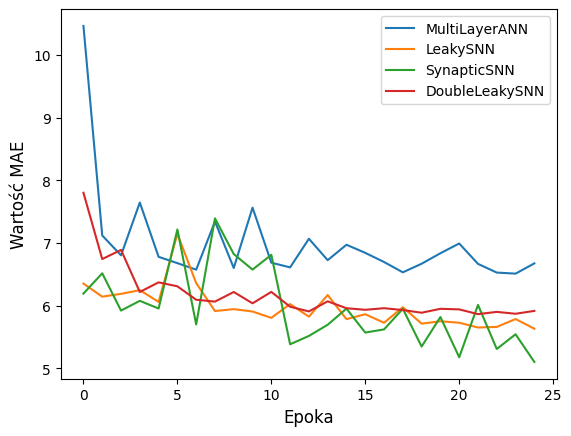

In [8]:
img0 = multiple_models_one_x(range(25), [m1_stats[0], m2_stats[0], m3_stats[0], m4_stats[0]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                            x_label="Epoka", y_label="Wartość MAE", textsize=12)

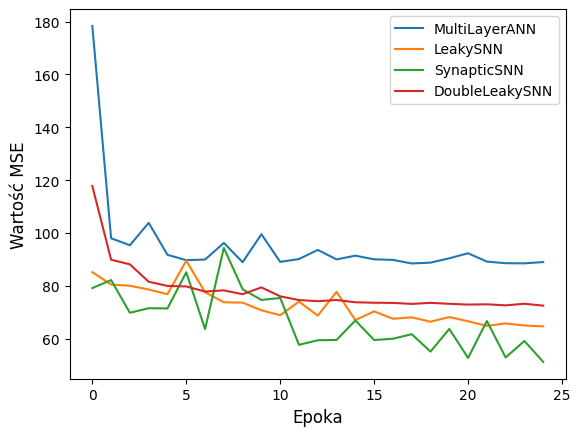

In [9]:
img1 = multiple_models_one_x(range(25), [m1_stats[1], m2_stats[1], m3_stats[1], m4_stats[1]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                            x_label="Epoka", y_label="Wartość MSE", textsize=12)

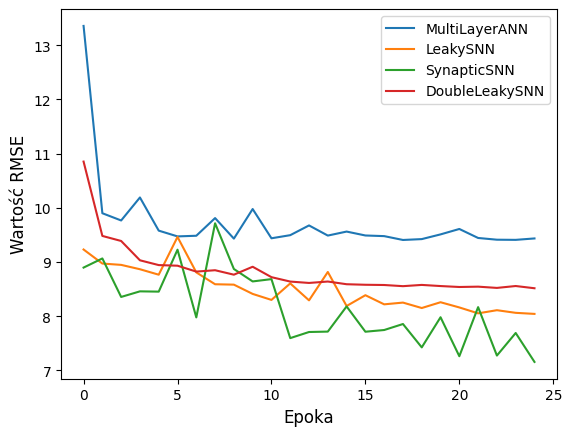

In [10]:
img2 = multiple_models_one_x(range(25), [m1_stats[2], m2_stats[2], m3_stats[2], m4_stats[2]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                             x_label="Epoka", y_label="Wartość RMSE", textsize=12)

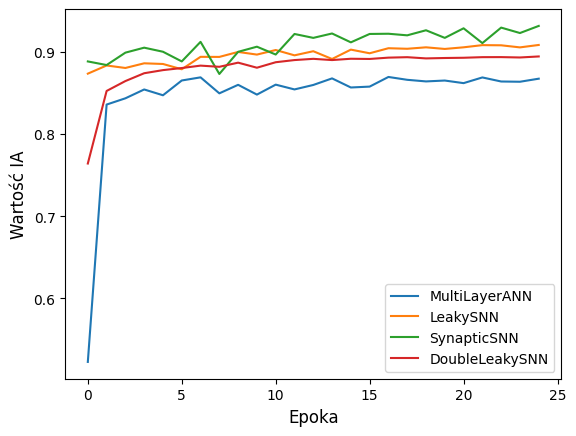

In [11]:
img3 = multiple_models_one_x(range(25), [m1_stats[3], m2_stats[3], m3_stats[3], m4_stats[3]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                             x_label="Epoka", y_label="Wartość IA", textsize=12)

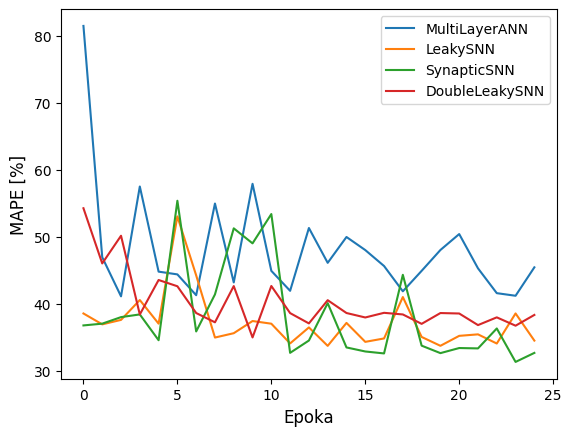

In [12]:
img4 = multiple_models_one_x(range(25), [m1_stats[4], m2_stats[4], m3_stats[4], m4_stats[4]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                             x_label="Epoka", y_label="MAPE [%]", textsize=12)

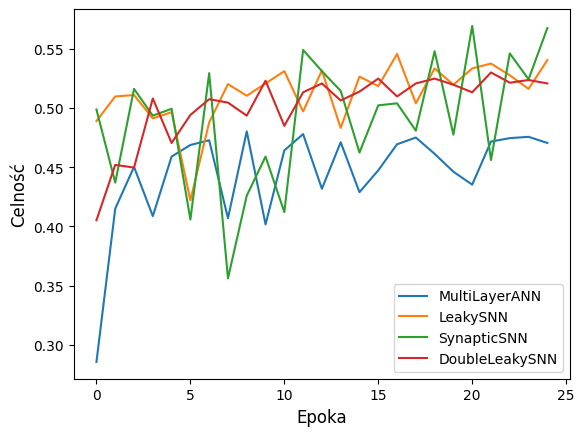

In [13]:
img5 = multiple_models_one_x(range(25), [m1_stats[5], m2_stats[5], m3_stats[5], m4_stats[5]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                             x_label="Epoka", y_label="Celność", textsize=12)

### Time graphs

In [15]:
model1 = MultiLayerANN(num_inputs=8, num_hidden=5000, num_outputs=1)
model2 = LeakySNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=25)
model3 = SynapticSNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=50)
model4 = DoubleLeakySNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=25)

In [16]:
m1_stats, m1_times = training_loop_stats(model1, train_loader, test_loader, device, num_epochs=97, collect_stats=True, collect_time=True)
m2_stats, m2_times = training_loop_stats(model2, train_loader, test_loader, device, num_epochs=50, collect_stats=True, collect_time=True)
m3_stats, m3_times = training_loop_stats(model3, train_loader, test_loader, device, num_epochs=25, collect_stats=True, collect_time=True)
m4_stats, m4_times = training_loop_stats(model4, train_loader, test_loader, device, num_epochs=27, collect_stats=True, collect_time=True)

100%|██████████| 27/27 [05:03<00:00, 11.24s/it]


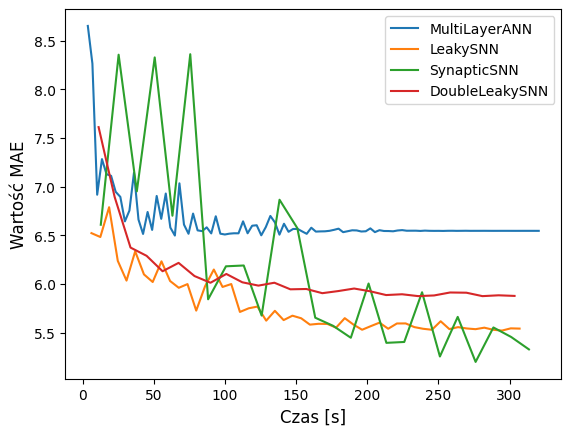

In [18]:
tm0 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[0], m2_stats[0], m3_stats[0], m4_stats[0]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                             x_label="Czas [s]", y_label="Wartość MAE", textsize=12)

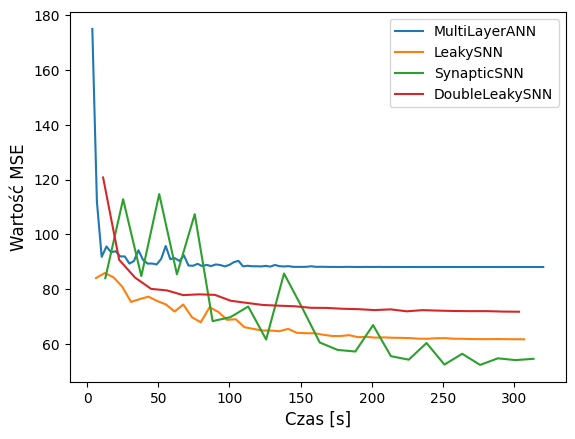

In [19]:
tm1 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[1], m2_stats[1], m3_stats[1], m4_stats[1]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                        x_label="Czas [s]", y_label="Wartość MSE", textsize=12)

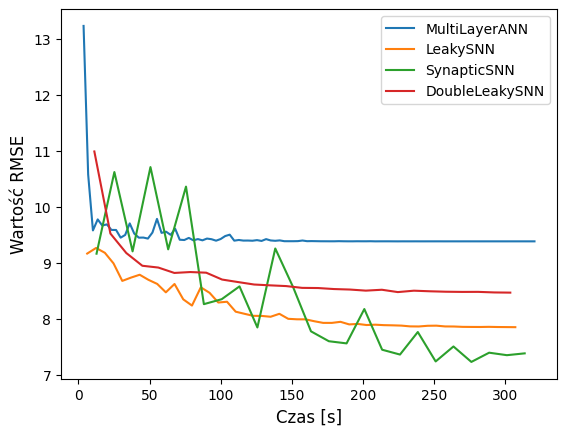

In [20]:
tm2 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[2], m2_stats[2], m3_stats[2], m4_stats[2]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                        x_label="Czas [s]", y_label="Wartość RMSE", textsize=12)

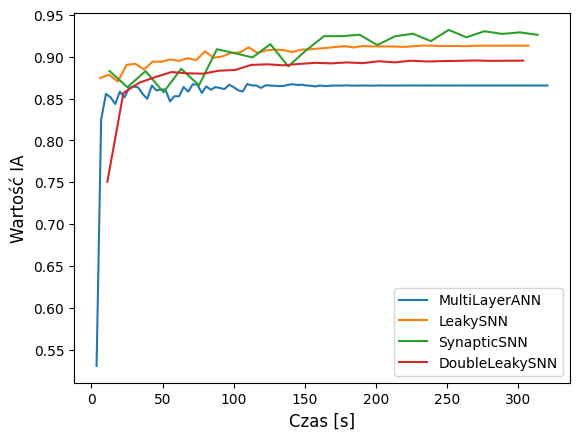

In [21]:
tm3 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[3], m2_stats[3], m3_stats[3], m4_stats[3]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                        x_label="Czas [s]", y_label="Wartość IA", textsize=12)

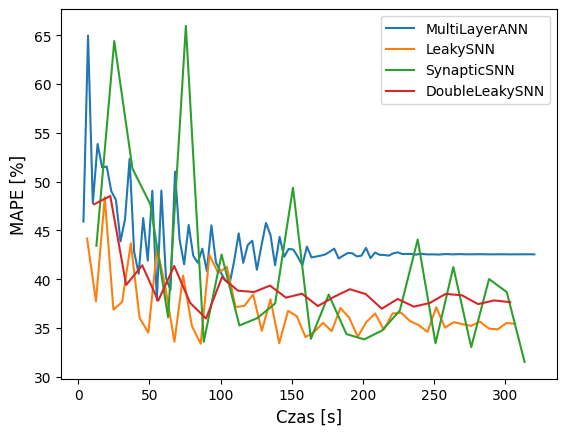

In [22]:
tm4 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[4], m2_stats[4], m3_stats[4], m4_stats[4]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                        x_label="Czas [s]", y_label="MAPE [%]", textsize=12)

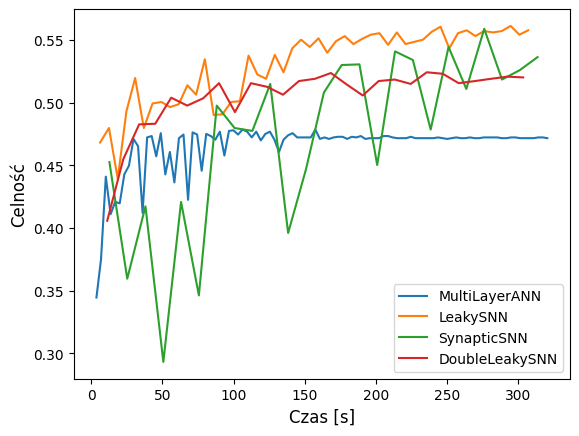

In [23]:
tm5 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[5], m2_stats[5], m3_stats[5], m4_stats[5]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                        x_label="Czas [s]", y_label="Celność", textsize=12)

### Scatter plots

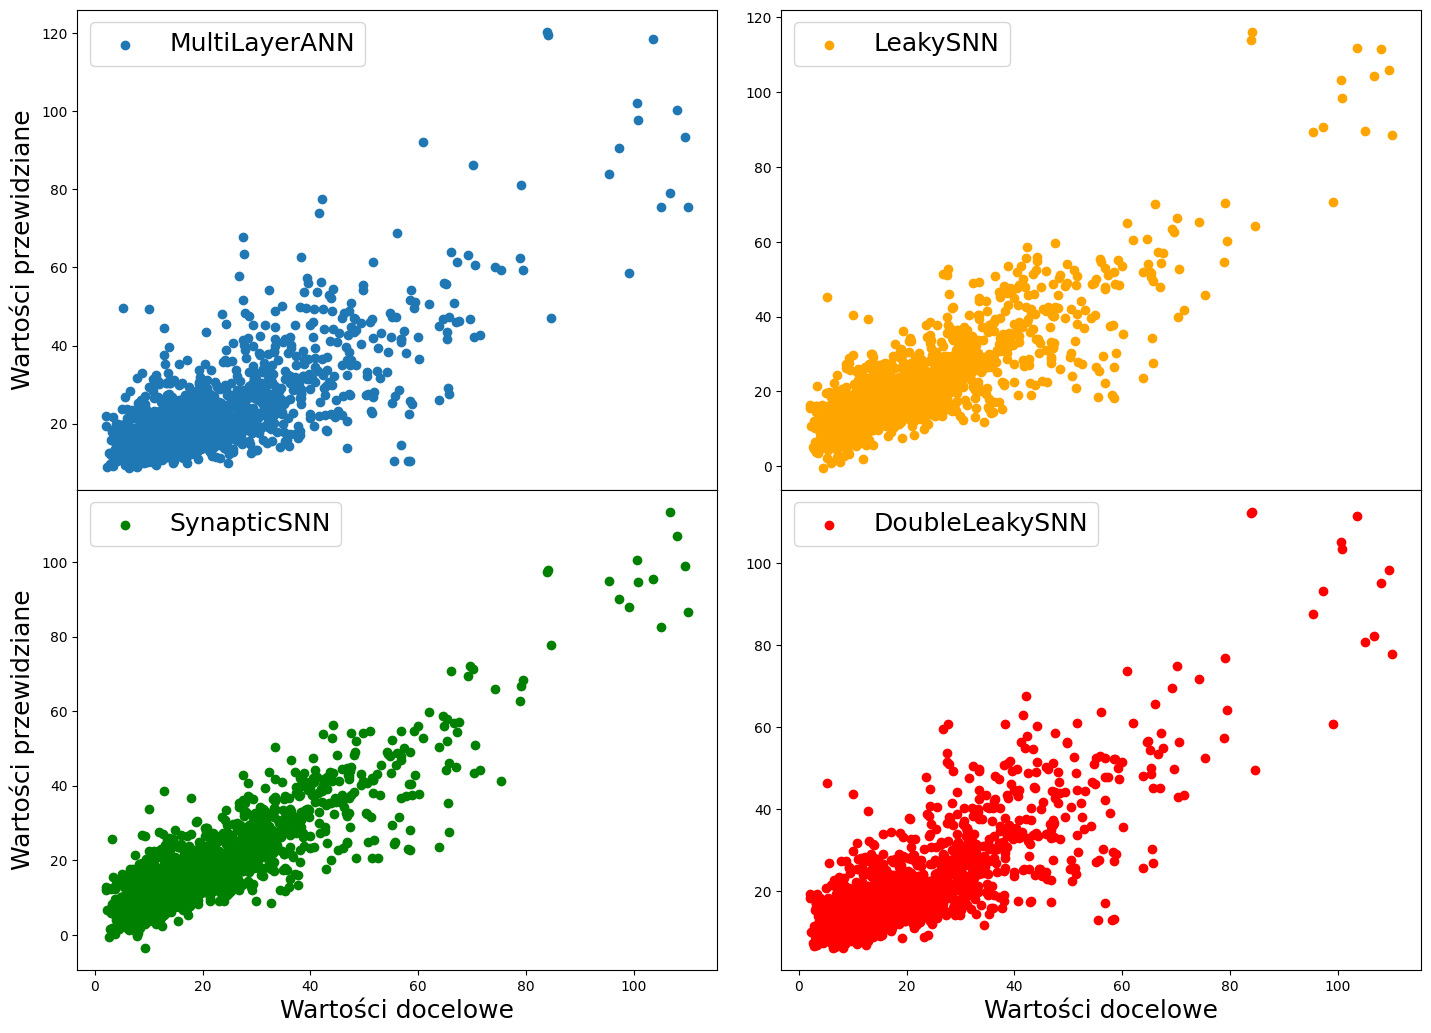

In [29]:
targets1, preds1 = gather_predictions(model1, test_loader, device)
targets2, preds2 = gather_predictions(model2, test_loader, device)
targets3, preds3 = gather_predictions(model3, test_loader, device)
targets4, preds4 = gather_predictions(model4, test_loader, device)
scatter_plots([targets1, targets2, targets3, targets4], [preds1, preds2, preds3, preds4])